In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [13]:
df = pd.read_csv("csv_result-chronic_kidney_disease_full.csv")
df.head()

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.020,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [15]:
df= df.rename(columns = lambda x:x.strip("'"))
df.replace('?', -1, inplace=True)
df.replace('normal', 1, inplace=True)
df.replace('abnormal', 0, inplace=True)
df.replace('present', 1, inplace=True)
df.replace('notpresent', 0, inplace=True)
df.replace('yes', 1, inplace=True)
df.replace('no', 0, inplace=True)
df.replace('good', 1, inplace=True)
df.replace('poor', 0, inplace=True)
df.replace('ckd', 1, inplace=True)
df.replace('notckd', 0, inplace=True)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48,80,1.020,1,0,-1,1,0,0,...,44,7800,5.2,1,1,0,1,0,0,1
1,2,7,50,1.020,4,0,-1,1,0,0,...,38,6000,-1,0,0,0,1,0,0,1
2,3,62,80,1.010,2,3,1,1,0,0,...,31,7500,-1,0,1,0,0,0,1,1
3,4,48,70,1.005,4,0,1,0,1,0,...,32,6700,3.9,1,0,0,0,1,1,1
4,5,51,80,1.010,2,0,1,1,0,0,...,35,7300,4.6,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55,80,1.020,0,0,1,1,0,0,...,47,6700,4.9,0,0,0,1,0,0,0
396,397,42,70,1.025,0,0,1,1,0,0,...,54,7800,6.2,0,0,0,1,0,0,0
397,398,12,80,1.020,0,0,1,1,0,0,...,49,6600,5.4,0,0,0,1,0,0,0
398,399,17,60,1.025,0,0,1,1,0,0,...,51,7200,5.9,0,0,0,1,0,0,0


In [16]:



df = df.astype({
    'id': 'int64',
    'age': 'int64',
    'bp': 'int64',
    'sg': 'float64',
    'al': 'int64',
    'su': 'int64',
    'rbc': 'category',
    'pc': 'category',
    'pcc': 'category',
    'ba': 'category',
    'bgr': 'float64',
    'bu': 'float64',
    'sc': 'float64',
    'sod': 'float64',
    'pot': 'float64',
    'hemo': 'float64',
    'pcv': 'int64',
    'wbcc': 'int64',
    'rbcc': 'float64',
    'htn': 'category',
    'dm': 'category',
    'cad': 'category',
    'appet': 'category',
    'pe': 'category',
    'ane': 'category',
    'class': 'category',
 
})

In [17]:
df.replace(-1,np.nan, inplace=True)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,NaN,1,0,0,...,44.0,7800.0,5.2,1,1,0,1,0,0,1
1,2,7.0,50.0,1.020,4.0,0.0,NaN,1,0,0,...,38.0,6000.0,NaN,0,0,0,1,0,0,1
2,3,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,NaN,0,1,0,0,0,1,1
3,4,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,0,1,1,1
4,5,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,47.0,6700.0,4.9,0,0,0,1,0,0,0
396,397,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,54.0,7800.0,6.2,0,0,0,1,0,0,0
397,398,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,49.0,6600.0,5.4,0,0,0,1,0,0,0
398,399,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,51.0,7200.0,5.9,0,0,0,1,0,0,0


In [18]:
for column in df:
    if df[column].dtype== 'float64'or df[column].dtype== 'int64':
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    if df[column].dtype =='category':
        most_common_value = df[column].mode()[0]
        df[column].fillna(most_common_value, inplace=True)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,2,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,3,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,4,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,5,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,47.0,6700.0,4.900000,0,0,0,1,0,0,0
396,397,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,54.0,7800.0,6.200000,0,0,0,1,0,0,0
397,398,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,49.0,6600.0,5.400000,0,0,0,1,0,0,0
398,399,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,51.0,7200.0,5.900000,0,0,0,1,0,0,0


In [20]:
X = df.iloc[:,1:-1]
y = df.iloc[:,25]

new_X = X.copy()

float_cols = X.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
new_X[float_cols] = scaler.fit_transform(df[float_cols])

new_X
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,15.4,44.0,7800.0,5.200000,1,1,0,1,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,11.3,38.0,6000.0,4.707435,0,0,0,1,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,9.6,31.0,7500.0,4.707435,0,1,0,0,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,11.2,32.0,6700.0,3.900000,1,0,0,0,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,11.6,35.0,7300.0,4.600000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,15.7,47.0,6700.0,4.900000,0,0,0,1,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,16.5,54.0,7800.0,6.200000,0,0,0,1,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,15.8,49.0,6600.0,5.400000,0,0,0,1,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,14.2,51.0,7200.0,5.900000,0,0,0,1,0,0


In [27]:
x_train,x_test,y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state=5)
x_train_scaled,x_test_scaled,y_train_scaled, y_test_scaled = train_test_split(new_X,y,test_size = 0.270,random_state=33)

In [28]:
Gnb = GaussianNB()
GnbS = GaussianNB()
Gnb.fit(x_train ,y_train)
GnbS.fit(x_train_scaled,y_train_scaled)

GaussianNB()

In [29]:
y_pred = Gnb.predict(x_test)
y_scaled_pred = GnbS.predict(x_test_scaled)

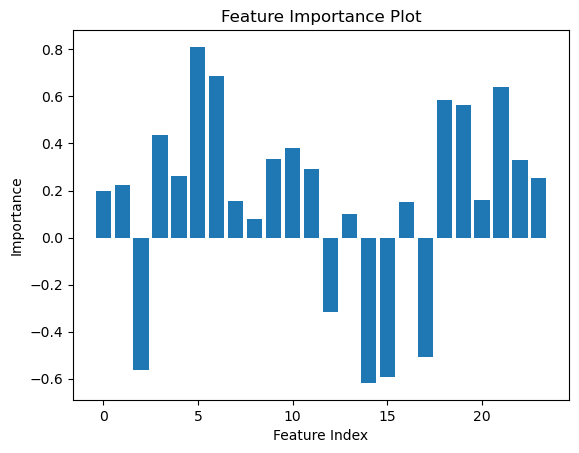

In [37]:
feature_importances = GnbS.theta_[1]  # Assuming you want to get feature importances for class 1

# Plot the feature importances
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.savefig('featureimportance.png')
plt.show()

In [31]:
x_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
269,25.000000,80.0,1.025,0.0,0.0,1,1,0,0,121.0,...,15.0,48.000000,6900.000000,5.300000,0,0,0,1,0,0
26,75.000000,80.0,1.015,0.0,0.0,1,1,0,0,156.0,...,11.6,35.000000,10300.000000,4.000000,1,1,0,0,0,0
153,55.000000,90.0,1.010,2.0,1.0,0,0,0,0,273.0,...,8.3,22.000000,14600.000000,2.900000,1,1,0,0,1,1
321,65.000000,60.0,1.020,0.0,0.0,1,1,0,0,109.0,...,13.9,48.000000,9600.000000,4.800000,0,0,0,1,0,0
199,65.000000,80.0,1.015,0.0,0.0,1,1,0,0,92.0,...,8.8,25.000000,10700.000000,3.200000,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,51.483376,100.0,1.015,2.0,0.0,0,0,0,0,129.0,...,4.8,14.000000,6300.000000,4.707435,1,0,0,1,1,1
118,55.000000,70.0,1.010,3.0,0.0,1,1,0,0,99.0,...,11.4,38.884498,8406.122449,4.707435,0,0,0,0,1,0
189,64.000000,60.0,1.010,4.0,1.0,0,0,0,1,239.0,...,9.5,29.000000,7500.000000,3.400000,1,1,0,0,1,0
206,60.000000,70.0,1.010,1.0,0.0,1,1,0,0,109.0,...,13.8,41.000000,8406.122449,4.707435,1,0,0,1,0,0


In [32]:
confusion = confusion_matrix(y_test_scaled, y_scaled_pred)
accuracy = round(metrics.accuracy_score(y_test_scaled, y_scaled_pred),3)
precision = round(metrics.precision_score(y_test_scaled, y_scaled_pred),3)
recall = round(metrics.recall_score(y_test_scaled, y_scaled_pred),3)
f1 = round(metrics.f1_score(y_test_scaled, y_scaled_pred),3)
auc = round(roc_auc_score(y_test_scaled, y_scaled_pred),3)
scores = cross_val_score(GnbS, new_X, y, cv=5)
print("\tNaive Bayes - scaled")
print('Confusion Matrics:\t\t',confusion)
print("Accuracy:\t\t\t",accuracy) 
print("Precision:\t\t\t",precision) 
print("Recall:\t\t\t\t",recall) 
print("F1:\t\t\t\t",f1) 
print("Auc:\t\t\t\t",auc) 
print("Cross-validation scores:\t", scores)


	Naive Bayes - scaled
Confusion Matrics:		 [[53  0]
 [ 6 49]]
Accuracy:			 0.944
Precision:			 1.0
Recall:				 0.891
F1:				 0.942
Auc:				 0.945
Cross-validation scores:	 [0.975  0.975  0.925  0.9375 0.925 ]


In [1]:
confusion = confusion_matrix(y_test, y_pred)
accuracy = round(metrics.accuracy_score(y_test, y_pred),3)
precision = round(metrics.precision_score(y_test, y_pred),3)
recall = round(metrics.recall_score(y_test, y_pred),3)
f1 = round(metrics.f1_score(y_test, y_pred),3)
auc = round(roc_auc_score(y_test, y_pred),3)
scores = cross_val_score(Gnb, X, y, cv=5)
print("\tNaive Bayes")
print('Confusion Matrics:\t\t',confusion)
print("Accuracy:\t\t\t",accuracy) 
print("Precision:\t\t\t",precision) 
print("Recall:\t\t\t\t",recall) 
print("F1:\t\t\t\t",f1) 
print("Auc:\t\t\t\t",auc) 
print("Cross-validation scores:\t", scores)


NameError: name 'confusion_matrix' is not defined

In [103]:
scaler = StandardScaler()
features = df.iloc[:, 1:24]  # Select the first 24 columns as features

x_scaled = scaler.fit_transform(features)  # Scale the first 24 columns
x_df = pd.DataFrame(x_scaled, columns=features.columns)
x_df
features

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,4.627244,15.4,44.0,7800.0,5.200000,1,1,0,1,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,4.627244,11.3,38.0,6000.0,4.707435,0,0,0,1,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,4.627244,9.6,31.0,7500.0,4.707435,0,1,0,0,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,2.500000,11.2,32.0,6700.0,3.900000,1,0,0,0,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,4.627244,11.6,35.0,7300.0,4.600000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,4.900000,15.7,47.0,6700.0,4.900000,0,0,0,1,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,3.500000,16.5,54.0,7800.0,6.200000,0,0,0,1,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,4.400000,15.8,49.0,6600.0,5.400000,0,0,0,1,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,4.900000,14.2,51.0,7200.0,5.900000,0,0,0,1,0
